
## GeostatsPy: a Set of Functions for GSLIB: Geostatistical Library into Python Workflows



### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube Lectures](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)


If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Explanation of GeostatsPy

GeostatsPy includes functions that run 2D workflows in GSLIB from Python (i.e. low tech wrappers) and in some cases reimplementations of GSLIB methods, along with utilities to move between GSLIB's Geo-EAS data sets and DataFrames, and grids and 2D Numpy arrays respectively and other useful operations such as resampling from regular datasets and rescaling distributions.  Here's a sumary list of functions avaible.

0. import and export from GSLIB's Geo-EAS format
1. histograms
2. location maps and combined location map and pixel plot
3. affine and nscore distribution transformations
4. variogram calculation and modeling
5. sgsim unconditional and conditional
6. cosgsim unconditonal
7. regular, random and user-specified resampling from a grid 

The reimplimentations are mainly of the visualizations using the standard GSLIB parametric inputs and Matplotlib back end. The low tech wrappers simply write the GSLIB parameters, run the GSLIB executables and then read in the GSLIB output. 

Why do it this way? I wanted a set of functions for working with the very robust and numerically efficient GSLIB Geostatistical Library (Deutsch and Journel, 1998) from Python.  There are other current solutions in Python.  I found that these solutions are either proprietary (not open source), not maintained or missing vital functionality; therefore, I have not been able to use these other solutions to teach modeling workflows to students with little or no programming experience.  Imagine getting 55 undergraduate students to role back ot a previous version on Python because a single dependency of an available package is not available in a current Python version.  Image a student about to submit an assignment that won't work immdeiately before submission because of an update. I need methods for my students that just work, are reliable and do not require students to complete a more complicated environment setup.

Deutsch and Journel (1998) gave the community GSLIB, an extremely robust and flexible set of tools to build spatial modeling workflows.  I have spent almost 20 years working with GSLIB along with a wide variety of subsurface modeling software. The powerful flexibility of GSLIB may be lost in methods that attempt to 'can' the inputs and parameters into complicated and hard to work with objects or attempt to combine the programs into a single program.  I love open source for teaching the theory, students must see under the hood!  The concept of basic building blocks and simple, common inputs is essential to GSLIB.  I tried to preserve this by putting together functions with the same conventions as GSLIB, the result is a set of functions that (1) are practical for my students to use and (2) will move the GSLIB veterans into Python workflow construction. Honestly, I did nothing original, but that was my intention.  

Of course, I could have properly wrapped GSLIB, built a proper package and maintained it as open source free to all.    I address this one day or maybe someone else will do that. That would be good for our community.  I'm just a new professor keeping barely keeping up with providing new quality classes and supporting materials to students, supporting my graduate students and finding funding.  Providing tools to support the community is something I believe in, I learned that as a PhD student with the great opportunity to be supervised by Clayton Deutsch.  I'll do what I can.

#### The GeostatsPy Functions

The next block includes all the current functions.  To use them save this as a .py file and import it at the beginning of your Python workflow. You could also just include them in the workflow as I do below.  The executables associated with the functions should be in the current working directory.  These include GSLIB programs.

1. nscore.exe
2. declus.exe
3. gam.exe
4. gamv.exe
5. vmodel.exe
6. kb2d.exe
7. sgsim.exe

The source for these are available from GSLIB.com.  If you would like to get the executables, ready to use without any need to compile them, go to GSLIB.com for Windows and Linux.  I failed to find any Mac OS X executables so my Ph.D. student Wendi Liu compiled them for us (thank you Wendi!) and we have posted them here https://github.com/GeostatsGuy/GSLIB_MacOS.  If folks on Windows are encountering missing DLL's, I could post static builds.  Wendi provided instructions to help Mac users with missing DLL issues at that same location above.

The functions are followed by a set of demonstrations.  There is no attempt to build a comprehensive workflow nor demonstrate best practice, but the demonstrations should provide examples usecases to help you build your own workflows and benchmarks for testing.

#### Required Libraries

GeostatPy functions require some packages including:

1. NumPy
2. Pandas
3. Matplotlib

along with miscellaneous operating system interfaces (os) and pseudo-random numbers (rand).  By design these are all standard and should be available with standard Python installs (e.g. https://www.anaconda.com/download/).

#### Images 

The graphical methods have 2 variants.  '_ST' specifies that function is suitable for building subplots (stacked / combined images) while those without '_ST' are for stand-alone images (output in the output block and as an image file). The resolution and image file type are specified at the top of the GeostatPy functions.   

#### Assistance Welcome

Found an issue (I'm sure there are issues!)? Got a new idea? Want to work on this? Let me know, submit revisions, I'm happy to collaborate.


In [85]:
# Some GeostatsPy Functions - by Michael Pyrcz, maintained at https://git.io/fNgR7.
# A set of functions to provide access to GSLIB in Python.
# GSLIB executables: nscore.exe, declus.exe, gam.exe, gamv.exe, vmodel.exe, kb2d.exe & sgsim.exe must be in the working directory 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt                          
import random as rand
image_type = 'tif'; dpi = 600

# utility to convert 1D or 2D numpy ndarray to a GSLIB Geo-EAS file for use with GSLIB methods   
def ndarray2GSLIB(array,data_file,col_name):
    file_out = open(data_file, "w")
    file_out.write(data_file + '\n')  
    file_out.write('1 \n')  
    file_out.write(col_name  + '\n') 
    if array.ndim == 2:
        ny = (array.shape[0])
        nx = (array.shape[1])
        ncol = 1
        for iy in range(0, ny):
            for ix in range(0, nx):
                file_out.write(str(array[ny-1-iy,ix])+ '\n')        
    elif array.ndim == 1:
        nx = len(array)        
        for ix in range(0, nx):
            file_out.write(str(array[ix])+ '\n')             
    else:       
        Print("Error: must use a 2D array")            
        file_out.close()
        return            
    file_out.close()

# utility to convert GSLIB Geo-EAS files to a 1D or 2D numpy ndarray for use with Python methods
def GSLIB2ndarray(data_file,kcol,nx,ny): 
    colArray = []
    if ny > 1:
        array = np.ndarray(shape=(ny,nx),dtype=float,order='F')
    else:
        array = np.zeros(nx)    
    with open(data_file) as myfile:   # read first two lines
        head = [next(myfile) for x in range(2)]
        line2 = head[1].split()
        ncol = int(line2[0])          # get the number of columns
        for icol in range(0, ncol):   # read over the column names
            head = [next(myfile) for x in range(1)]
            if icol == kcol:
                col_name = head[0].split()[0]       
        if ny > 1:
            for iy in range(0,ny):
                for ix in range(0,nx):
                    head = [next(myfile) for x in range(1)]
                    array[ny-1-iy][ix] = head[0].split()[kcol]
        else:
            for ix in range(0,nx):
                head = [next(myfile) for x in range(1)]
                array[ix] = head[0].split()[kcol]
    return array,col_name

# utility to convert pandas DataFrame to a GSLIB Geo-EAS file for use with GSLIB methods
def Dataframe2GSLIB(data_file,df):
    colArray = []
    colArray = df.columns
    ncol = len(df.columns) 
    nrow = len(df.index)
    file_out = open(data_file, "w")
    file_out.write(data_file + '\n')  
    file_out.write(str(ncol) + '\n') 
    for icol in range(0, ncol): 
        file_out.write(df.columns[icol]  + '\n')    
    for irow in range(0, nrow):
        for icol in range(0, ncol):
            file_out.write(str(df.iloc[irow,icol])+ ' ')  
        file_out.write('\n')
    file_out.close()   

# utility to convert GSLIB Geo-EAS files to a pandas DataFrame for use with Python methods
def GSLIB2Dataframe(data_file):
    colArray = []
    with open(data_file) as myfile:   # read first two lines
        head = [next(myfile) for x in range(2)]
        line2 = head[1].split()
        ncol = int(line2[0])
        for icol in range(0, ncol):
            head = [next(myfile) for x in range(1)]
            colArray.append(head[0].split()[0])
        data = np.loadtxt(myfile, skiprows = 0)
        df = pd.DataFrame(data)
        df.columns = colArray
        return df

# histogram, reimplemented in Python of GSLIB hist with MatPlotLib methods, displayed and as image file
def hist(array,xmin,xmax,log,cumul,bins,weights,xlabel,title,fig_name):
    plt.figure(figsize=(8,6))
    cs = plt.hist(array, alpha = 0.2, color = 'red', edgecolor = 'black', bins=bins, range = [xmin,xmax], weights = weights, log = log, cumulative = cumul)
    plt.title(title)
    plt.xlabel(xlabel); plt.ylabel('Frequency')  
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)
    plt.show()
    return

# histogram, reimplemented in Python of GSLIB hist with MatPlotLib methods (version for subplots)
def hist_st(array,xmin,xmax,log,cumul,bins,weights,xlabel,title):  
    cs = plt.hist(array, alpha = 0.2, color = 'red', edgecolor = 'black', bins=bins, range = [xmin,xmax], weights = weights, log = log, cumulative = cumul)
    plt.title(title)
    plt.xlabel(xlabel); plt.ylabel('Frequency') 
    return

# location map, reimplemention in Python of GSLIB locmap with MatPlotLib methods
def locmap(df,xcol,ycol,vcol,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap,fig_name):
    ixy = 0 
    plt.figure(figsize=(8,6))    
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im, orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)
    plt.show()
    return im

# location map, reimplemention in Python of GSLIB locmap with MatPlotLib methods (version for subplots)
def locmap_st(df,xcol,ycol,vcol,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    ixy = 0   
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im, orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    return im           

# pixel plot, reimplemention in Python of GSLIB pixelplt with MatPlotLib methods
def pixelplt(array,xmin,xmax,ymin,ymax,step,vmin,vmax,title,xlabel,ylabel,vlabel,cmap,fig_name):
    print(str(step))
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    plt.figure(figsize=(8,6))
    im = plt.contourf(xx,yy,array,cmap=cmap,vmin=vmin,vmax=vmax,levels=np.linspace(vmin,vmax,100))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im,orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)
    plt.show()
    return im

# pixel plot, reimplemention in Python of GSLIB pixelplt with MatPlotLib methods(version for subplots)
def pixelplt_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    ixy = 0 
    x = [];y = []; v = [] # use dummy since scatter plot controls legend min and max appropriately and contour does not!
    cs = plt.contourf(xx,yy,array,cmap=cmap,vmin=vmin,vmax=vmax,levels = np.linspace(vmin,vmax,100))
    im = plt.scatter(x,y,s=None, c=v, marker=None,cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.clim(vmin,vmax)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    return cs

# pixel plot, reimplemention in Python of GSLIB pixelplt with MatPlotLib methods (version for subplots, log scale)
def pixelplt_log_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    ixy = 0 
    x = [];y = []; v = [] # use dummy since scatter plot controls legend min and max appropriately and contour does not!
    color_int = np.r_[np.log(vmin):np.log(vmax):0.5]
    color_int = np.exp(color_int)
    cs = plt.contourf(xx,yy,array,cmap=cmap,vmin=vmin,vmax=vmax,levels = color_int, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
    im = plt.scatter(x,y,s=None, c=v, marker=None,cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black",norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.clim(vmin,vmax)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    return cs

# pixel plot and location map, reimplementation in Python of a GSLIB MOD with MatPlotLib methods
def locpix(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel,cmap,fig_name):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    ixy = 0 
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, array, cmap=cmap,vmin=vmin, vmax=vmax,levels = np.linspace(vmin,vmax,100))
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)  
    cbar = plt.colorbar(orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)
    plt.show()
    return cs

# pixel plot and location map, reimplementation in Python of a GSLIB MOD with MatPlotLib methods(version for subplots)
def locpix_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel,cmap):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    ixy = 0 
    cs = plt.contourf(xx, yy, array, cmap=cmap,vmin=vmin, vmax=vmax,levels = np.linspace(vmin,vmax,100))
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    cbar = plt.colorbar(orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    return cs

def locpix_log_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel,cmap,fig_name):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    ixy = 0 
    color_int = np.r_[np.log(vmin):np.log(vmax):0.5]
    color_int = np.exp(color_int)
    cs = plt.contourf(xx, yy, array, cmap=cmap,vmin=vmin, vmax=vmax,levels = color_int, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
    im = plt.scatter(df[xcol],df[ycol],s=None, c=df[vcol], marker=None, cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black",norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    cbar = plt.colorbar(orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    return cs

# affine distribution correction reimplemented in Python with numpy methods 
def affine(array,tmean,tstdev):    
    if array.ndim != 2:
        Print("Error: must use a 2D array")
        return
    nx = array.shape[0]
    ny = array.shape[1]
    mean = np.average(array)
    stdev = np.std(array)
    for iy in range(0,ny):
        for ix in range(0,nx):
             array[ix,iy] = (tstdev/stdev)*(array[ix,iy] - mean) + tmean  
    return(array) 

# normal score transform, wrapper for nscore from GSLIB (.exe must be in working directory)(not used in this demo)   
def nscore(x):
    import os
    import numpy as np
    file = 'nscore_out.dat'
    nx = np.ma.size(x); ny = 1
    ndarray2GSLIB(x,"nscore.dat","value")
    file = open("nscore.par", "w")
    file.write("                  Parameters for NSCORE                                    \n")
    file.write("                  *********************                                    \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("nscore.dat           -file with data                                       \n")
    file.write("1   0                    -  columns for variable and weight                \n")
    file.write("-1.0e21   1.0e21         -  trimming limits                                \n")
    file.write("0                        -1=transform according to specified ref. dist.    \n")
    file.write("../histsmth/histsmth.out -  file with reference dist.                      \n")
    file.write("1   2                    -  columns for variable and weight                \n")
    file.write("nscore.out               -file for output                                  \n")
    file.write("nscore.trn               -file for output transformation table             \n")
    file.close()
    
    os.system('nscore.exe nscore.par')
    file_in = 'nscore.out'
    y,name = GSLIB2ndarray('nscore.out',1,nx,ny)
    return(y)

def make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2=1,cc2=0,azi2=0,hmaj2=0,hmin2=0):
    if cc2 == 0:
        nst = 1
    var = dict([('nug', nug), ('nst', nst), ('it1', it1),('cc1', cc1),('azi1', azi1),('hmaj1', hmaj1), ('hmin1', hmin1), 
      ('it2', it2),('cc2', cc2),('azi2', azi2),('hmaj2', hmaj2), ('hmin2', hmin2)])
    if nug + cc1 + cc2 != 1:
        print('\x1b[0;30;41m make_variogram Warning: sill does not sum to 1.0, do not use in simulation \x1b[0m')
    if cc1 < 0 or cc2 < 0 or nug < 0 or hmaj1 < 0 or hmaj2 < 0 or hmin1 < 0 or hmin2 < 0:
        print('\x1b[0;30;41m make_variogram Warning: contributions and ranges must be all positive \x1b[0m')
    if hmaj1 < hmin1 or hmaj2 < hmin2:
        print('\x1b[0;30;41m make_variogram Warning: major range should be greater than minor range \x1b[0m')
    return var

# irregularly sampled variogram, 2D wrapper for gam from GSLIB (.exe must be in working directory)
def gamv_2d(df,xcol,ycol,vcol,nlag,lagdist,azi,atol,bstand):
    import os
    import numpy as np
    lag = []; gamma = []; npair = []
    df_ext = pd.DataFrame({'X':df[xcol],'Y':df[ycol],'Z':df[vcol]})
    Dataframe2GSLIB("gamv_out.dat",df_ext)
    file = open("gamv.par", "w")
    file.write("                  Parameters for GAMV                                      \n")
    file.write("                  *******************                                      \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("gamv_out.dat                    -file with data                            \n") 
    file.write("1   2   0                         -   columns for X, Y, Z coordinates      \n")
    file.write("1   3   0                         -   number of variables,col numbers      \n")
    file.write("-1.0e21     1.0e21                -   trimming limits                      \n")
    file.write("gamv.out                          -file for variogram output               \n")
    file.write(str(nlag) + "                      -number of lags                          \n")
    file.write(str(lagdist) + "                       -lag separation distance                 \n")
    file.write(str(lagdist*0.5) + "                   -lag tolerance                           \n")
    file.write("1                                 -number of directions                    \n")
    file.write(str(azi) + " " + str(atol) + " 99999.9 0.0  90.0  50.0  -azm,atol,bandh,dip,dtol,bandv \n")
    file.write(str(bstand) + "                    -standardize sills? (0=no, 1=yes)        \n")
    file.write("1                                 -number of variograms                    \n")
    file.write("1   1   1                         -tail var., head var., variogram type    \n")
    file.close()   

    os.system('gamv.exe gamv.par')
    reading = True
    with open("gamv.out") as myfile:   
        head = [next(myfile) for x in range(1)] # skip the first line
        iline = 0
        while reading:
            try:
                head = [next(myfile) for x in range(1)]
                lag.append(float(head[0].split()[1]))
                gamma.append(float(head[0].split()[2]))
                npair.append(float(head[0].split()[3]))
                iline = iline + 1
            except StopIteration:
                reading = False   
    return(lag,gamma,npair)  

# irregular spaced data, 2D wrapper for varmap from GSLIB (.exe must be in working directory)
def varmapv_2d(df,xcol,ycol,vcol,nx,ny,lagdist,minpairs,vmax,bstand,title,vlabel):
    import os
    import numpy as np
    
    lag = []; gamma = []; npair = []
    
    df_ext = pd.DataFrame({'X':df[xcol],'Y':df[ycol],'Z':rand_sample[vcol]})
    Dataframe2GSLIB("varmap_out.dat",df_ext)
    
    file = open("varmap.par", "w")
    
    file.write("              Parameters for VARMAP                                        \n")
    file.write("              *********************                                        \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("varmap_out.dat          -file with data                                    \n")
    file.write("1   3                        -   number of variables: column numbers       \n")
    file.write("-1.0e21     1.0e21           -   trimming limits                           \n")
    file.write("0                            -1=regular grid, 0=scattered values           \n")
    file.write(" 50   50    1                -if =1: nx,     ny,   nz                      \n")
    file.write("1.0  1.0  1.0                -       xsiz, ysiz, zsiz                      \n") 
    file.write("1   2   0                    -if =0: columns for x,y, z coordinates        \n") 
    file.write("varmap.out                   -file for variogram output                    \n")
    file.write(str(nx) + " " + str(ny) + " 0 " + "-nxlag, nylag, nzlag                     \n")
    file.write(str(lagdist) + " " + str(lagdist) + " 1.0              -dxlag, dylag, dzlag \n")
    file.write(str(minpairs) + "             -minimum number of pairs                      \n")
    file.write(str(bstand) + "               -standardize sill? (0=no, 1=yes)              \n")
    file.write("1                            -number of variograms                         \n") 
    file.write("1   1   1                    -tail, head, variogram type                   \n")
    file.close()
    
    os.system('varmap.exe varmap.par')
    nnx = nx*2+1; nny = ny*2+1
    varmap, name = GSLIB2ndarray("varmap.out",0,nnx,nny)               
          
    xmax = ((float(nx)+0.5)*lagdist); xmin = -1*xmax; 
    ymax = ((float(ny)+0.5)*lagdist); ymin = -1*ymax; 
    pixelplt(varmap,xmin,xmax,ymin,ymax,lagdist,0,vmax,title,'X','Y',vlabel,cmap)
    return(varmap)  

# regular spaced data, 2D wrapper for varmap from GSLIB (.exe must be in working directory)
def varmap_2d(array,nx,ny,hsiz,nlagx,nlagy,minpairs,vmax,bstand,title,vlabel):
    import os
    import numpy as np
     
    ndarray2GSLIB(array,"varmap_out.dat","gam.dat")
    
    file = open("varmap.par", "w")
    
    file.write("              Parameters for VARMAP                                        \n")
    file.write("              *********************                                        \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("varmap_out.dat          -file with data                                    \n")
    file.write("1   1                        -   number of variables: column numbers       \n")
    file.write("-1.0e21     1.0e21           -   trimming limits                           \n")
    file.write("1                            -1=regular grid, 0=scattered values           \n")
    file.write(str(nx) + " " + str(ny) + " 1  -if =1: nx,     ny,   nz                     \n")
    file.write(str(hsiz) + " " + str(hsiz) + " 1.0  - xsiz, ysiz, zsiz                     \n") 
    file.write("1   2   0                    -if =0: columns for x,y, z coordinates        \n") 
    file.write("varmap.out                   -file for variogram output                    \n")
    file.write(str(nlagx) + " " + str(nlagy) + " 0 " + "-nxlag, nylag, nzlag               \n")
    file.write(str(hsiz) + " " + str(hsiz) + " 1.0              -dxlag, dylag, dzlag       \n")
    file.write(str(minpairs) + "             -minimum number of pairs                      \n")
    file.write(str(bstand) + "               -standardize sill? (0=no, 1=yes)              \n")
    file.write("1                            -number of variograms                         \n") 
    file.write("1   1   1                    -tail, head, variogram type                   \n")
    file.close()
    
    os.system('varmap.exe varmap.par')
    nnx = nlagx*2+1; nny = nlagy*2+1
    varmap, name = GSLIB2ndarray("varmap.out",0,nnx,nny)               
          
    xmax = ((float(nlagx)+0.5)*hsiz); xmin = -1*xmax; 
    ymax = ((float(nlagy)+0.5)*hsiz); ymin = -1*ymax; 
    pixelplt(varmap,xmin,xmax,ymin,ymax,hsiz,0,vmax,title,'X','Y',vlabel,cmap)
    return(varmap)  

# variogram model, 2D wrapper for vmodel from GSLIB (.exe must be in working directory)
def vmodel_2d(nlag,step,azi,nug,nst,tstr1,c1,azi1,rmaj1,rmin1,tstr2=1,c2=0,azi2=0,rmaj2=0,rmin2=0):
    import os
    import numpy as np

    lag = []; gamma = []
    
    file = open("vmodel.par", "w")
    file.write("                                                                           \n")
    file.write("                  Parameters for VMODEL                                    \n")
    file.write("                  *********************                                    \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("vmodel.var                   -file for variogram output                    \n")
    file.write("1 " + str(nlag) + "          -number of directions and lags                \n")
    file.write(str(azi) + " 0.0 " + str(step) + " -azm, dip, lag distance                  \n")
    file.write(str(nst) + " " + str(nug) + " -nst, nugget effect                           \n")
    file.write(str(tstr1) + " " + str(c1) + " " + str(azi1) + " 0.0   0.0   0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(str(rmaj1) + " " + str(rmin1) + " 0.0 -a_hmax, a_hmin, a_vert               \n")
    file.write(str(tstr2) + " " + str(c2) + " " + str(azi2) + " 0.0   0.0   0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(str(rmaj2) + " " + str(rmin2) + " 0.0 -a_hmax, a_hmin, a_vert               \n")
    file.close()
    
    os.system('vmodel.exe vmodel.par')
    reading = True
    with open("vmodel.var") as myfile:   
        head = [next(myfile) for x in range(1)] # skip the first line
        iline = 0
        while reading:
            try:
                head = [next(myfile) for x in range(1)]
                lag.append(float(head[0].split()[1]))
                gamma.append(float(head[0].split()[2]))
                iline = iline + 1
            except StopIteration:
                reading = False   
    
    return(lag,gamma)

# cell-based declustering, 2D wrapper for declus from GSLIB (.exe must be in working directory)
def declus(df,xcol,ycol,vcol,cmin,cmax,cnum,bmin):
    import os
    import numpy as np
    nrow = len(df)
    weights = []
    file = 'declus_out.dat'
    file_out = open(file, "w")
    file_out.write('declus_out.dat' + '\n')  
    file_out.write('3' + '\n')  
    file_out.write('x' + '\n') 
    file_out.write('y' + '\n')
    file_out.write('value' + '\n')  
    for irow in range(0, nrow):
        file_out.write(str(df.iloc[irow][xcol])+' '+str(df.iloc[irow][ycol])+' '+str(df.iloc[irow][vcol])+' \n')        
    file_out.close()
    
    file = open("declus.par", "w")
    file.write("                  Parameters for DECLUS                                    \n")
    file.write("                  *********************                                    \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("declus_out.dat           -file with data                                   \n")
    file.write("1   2   0   3               -  columns for X, Y, Z, and variable           \n")
    file.write("-1.0e21     1.0e21          -  trimming limits                             \n")
    file.write("declus.sum                  -file for summary output                       \n") 
    file.write("declus.out                  -file for output with data & weights           \n")
    file.write("1.0   1.0                   -Y and Z cell anisotropy (Ysize=size*Yanis)    \n") 
    file.write(str(bmin) + "                -0=look for minimum declustered mean (1=max)   \n") 
    file.write(str(cnum) + " " + str(cmin) + " " + str(cmax) + " -number of cell sizes, min size, max size      \n")
    file.write("5                           -number of origin offsets                      \n")
    file.close()
    
    os.system('declus.exe declus.par')
    df = GSLIB2Dataframe("declus.out")
    for irow in range(0, nrow):
        weights.append(df.iloc[irow,3])    

    return(weights) 

# sequential Gaussian simulation, 2D unconditional wrapper for sgsim from GSLIB (.exe must be in working directory)
def GSLIB_sgsim_2d_uncond(nreal,nx,ny,hsiz,seed,var,output_file):
    import os
    import numpy as np 
    
    nug = var['nug']
    nst = var['nst']; it1 = var['it1']; cc1 = var['cc1']; azi1 = var['azi1']; hmaj1 = var['hmaj1']; hmin1 = var['hmin1'] 
    it2 = var['it2']; cc2 = var['cc2']; azi2 = var['azi2']; hmaj2 = var['hmaj2']; hmin2 = var['hmin2']     
    max_range = max(hmaj1,hmaj2) 
    hmn = hsiz * 0.5   
    hctab = int(max_range/hsiz)*2 + 1
    
    sim_array = np.random.rand(nx,ny)
  
    file = open("sgsim.par", "w")
    file.write("              Parameters for SGSIM                                         \n")
    file.write("              ********************                                         \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETER:                                                        \n")
    file.write("none                          -file with data                              \n")
    file.write("1  2  0  3  5  0              -  columns for X,Y,Z,vr,wt,sec.var.          \n")
    file.write("-1.0e21 1.0e21                -  trimming limits                           \n")
    file.write("0                             -transform the data (0=no, 1=yes)            \n")
    file.write("none.trn                      -  file for output trans table               \n")
    file.write("1                             -  consider ref. dist (0=no, 1=yes)          \n")
    file.write("none.dat                      -  file with ref. dist distribution          \n")
    file.write("1  0                          -  columns for vr and wt                     \n")
    file.write("-4.0    4.0                   -  zmin,zmax(tail extrapolation)             \n")
    file.write("1      -4.0                   -  lower tail option, parameter              \n")
    file.write("1       4.0                   -  upper tail option, parameter              \n")
    file.write("0                             -debugging level: 0,1,2,3                    \n")
    file.write("nonw.dbg                      -file for debugging output                   \n")
    file.write(str(output_file) + "           -file for simulation output                  \n")
    file.write(str(nreal) + "                 -number of realizations to generate          \n")
    file.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write("1 0.0 1.0                     - nz zmn zsiz                                \n")
    file.write(str(seed) + "                  -random number seed                          \n")
    file.write("0     8                       -min and max original data for sim           \n")
    file.write("12                            -number of simulated nodes to use            \n")
    file.write("0                             -assign data to nodes (0=no, 1=yes)          \n")
    file.write("1     3                       -multiple grid search (0=no, 1=yes),num      \n")
    file.write("0                             -maximum data per octant (0=not used)        \n")
    file.write(str(max_range) + " " + str(max_range) + " 1.0 -maximum search  (hmax,hmin,vert) \n")
    file.write(str(azi1) + "   0.0   0.0       -angles for search ellipsoid                 \n")
    file.write(str(hctab) + " " + str(hctab) + " 1 -size of covariance lookup table        \n")
    file.write("0     0.60   1.0              -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC        \n")
    file.write("none.dat                      -  file with LVM, EXDR, or COLC variable     \n")
    file.write("4                             -  column for secondary variable             \n")
    file.write(str(nst) + " " + str(nug) + "  -nst, nugget effect                          \n")
    file.write(str(it1) + " " + str(cc1) + " " +str(azi1) + " 0.0 0.0 -it,cc,ang1,ang2,ang3\n")
    file.write(" " + str(hmaj1) + " " + str(hmin1) + " 1.0 - a_hmax, a_hmin, a_vert        \n")
    file.write(str(it2) + " " + str(cc2) + " " +str(azi2) + " 0.0 0.0 -it,cc,ang1,ang2,ang3\n")
    file.write(" " + str(hmaj2) + " " + str(hmin2) + " 1.0 - a_hmax, a_hmin, a_vert        \n")  
    file.close()

    os.system('"sgsim.exe sgsim.par"')       
    sim_array = GSLIB2ndarray(output_file,0,nx,ny)         
    return(sim_array[0])

# kriging estimation, 2D wrapper for kb2d from GSLIB (.exe must be in working directory)
def GSLIB_kb2d_2d(df,xcol,ycol,vcol,nx,ny,hsiz,var,output_file):
    import os
    import numpy as np 
    
    X = df[xcol]; Y = df[ycol]; V = df[vcol]
    var_min = V.values.min();var_max = V.values.max()
    df_temp = pd.DataFrame({'X': X, 'Y': Y, 'Var': V})   
    Dataframe2GSLIB('data_temp.dat',df_temp)
    
    nug = var['nug']
    nst = var['nst']; it1 = var['it1']; cc1 = var['cc1']; azi1 = var['azi1']; hmaj1 = var['hmaj1']; hmin1 = var['hmin1'] 
    it2 = var['it2']; cc2 = var['cc2']; azi2 = var['azi2']; hmaj2 = var['hmaj2']; hmin2 = var['hmin2']     
    max_range = max(hmaj1,hmaj2) 
    hmn = hsiz * 0.5   
    hctab = int(max_range/hsiz)*2 + 1
    
    est_array = np.random.rand(nx,ny)
    var_array = np.random.rand(nx,ny)
  
    file = open("kb2d.par", "w")
    file.write("              Parameters for KB2D                                          \n")
    file.write("              ********************                                         \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETER:                                                        \n")
    file.write("data_temp.dat                         -file with data                      \n")
    file.write("1  2  3                               -  columns for X,Y,vr                \n")
    file.write("-1.0e21   1.0e21                      -   trimming limits                  \n")
    file.write("0                                     -debugging level: 0,1,2,3            \n")
    file.write("none.dbg                              -file for debugging output           \n")
    file.write(str(output_file) + "                   -file for kriged output              \n")
    file.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")               
    file.write("1    1                                -x and y block discretization        \n")
    file.write("1    30                               -min and max data for kriging        \n")
    file.write(str(max_range) + "                     -maximum search radius               \n")
    file.write("1    -9999.9                          -0=SK, 1=OK,  (mean if SK)           \n") 
    file.write(str(nst) + " " + str(nug) + "          -nst, nugget effect                  \n")
    file.write(str(it1) + " " + str(cc1) + " " + str(azi1) + " " + str(hmaj1) + " " +  str(hmin1) + " -it, c ,azm ,a_max ,a_min \n")  
    file.write(str(it2) + " " + str(cc2) + " " + str(azi2) + " " + str(hmaj2) + " " +  str(hmin2) + " -it, c ,azm ,a_max ,a_min \n")   
    file.close()

    os.system('"kb2d.exe kb2d.par"')       
    est_array = GSLIB2ndarray(output_file,0,nx,ny) 
    var_array = GSLIB2ndarray(output_file,1,nx,ny) 
    return(est_array[0],var_array[0])

# sequential Gaussian simulation, 2D wrapper for sgsim from GSLIB (.exe must be in working directory)
def GSLIB_sgsim_2d(nreal,df,xcol,ycol,vcol,nx,ny,hsiz,seed,var,output_file):
    import os
    import numpy as np 
    
    X = df[xcol]; Y = df[ycol]; V = df[vcol]
    var_min = V.values.min();var_max = V.values.max()
    df_temp = pd.DataFrame({'X': X, 'Y': Y, 'Var': V})   
    Dataframe2GSLIB('data_temp.dat',df_temp)
    
    nug = var['nug']
    nst = var['nst']; it1 = var['it1']; cc1 = var['cc1']; azi1 = var['azi1']; hmaj1 = var['hmaj1']; hmin1 = var['hmin1'] 
    it2 = var['it2']; cc2 = var['cc2']; azi2 = var['azi2']; hmaj2 = var['hmaj2']; hmin2 = var['hmin2']     
    max_range = max(hmaj1,hmaj2) 
    hmn = hsiz * 0.5   
    hctab = int(max_range/hsiz)*2 + 1
    
    sim_array = np.random.rand(nx,ny)
  
    file = open("sgsim.par", "w")
    file.write("              Parameters for SGSIM                                         \n")
    file.write("              ********************                                         \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETER:                                                        \n")
    file.write("data_temp.dat                 -file with data                              \n")
    file.write("1  2  0  3  0  0              -  columns for X,Y,Z,vr,wt,sec.var.          \n")
    file.write("-1.0e21 1.0e21                -  trimming limits                           \n")
    file.write("1                             -transform the data (0=no, 1=yes)            \n")
    file.write("none.trn                      -  file for output trans table               \n")
    file.write("0                             -  consider ref. dist (0=no, 1=yes)          \n")
    file.write("none.dat                      -  file with ref. dist distribution          \n")
    file.write("1  0                          -  columns for vr and wt                     \n")
    file.write(str(var_min) + " " + str(var_max) + "   zmin,zmax(tail extrapolation)       \n")
    file.write("1   " + str(var_min) + "      -  lower tail option, parameter              \n")
    file.write("1   " + str(var_max) + "      -  upper tail option, parameter              \n")
    file.write("0                             -debugging level: 0,1,2,3                    \n")
    file.write("nonw.dbg                      -file for debugging output                   \n")
    file.write(str(output_file) + "           -file for simulation output                  \n")
    file.write(str(nreal) + "                 -number of realizations to generate          \n")
    file.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write("1 0.0 1.0                     - nz zmn zsiz                                \n")
    file.write(str(seed) + "                  -random number seed                          \n")
    file.write("0     8                       -min and max original data for sim           \n")
    file.write("12                            -number of simulated nodes to use            \n")
    file.write("0                             -assign data to nodes (0=no, 1=yes)          \n")
    file.write("1     3                       -multiple grid search (0=no, 1=yes),num      \n")
    file.write("0                             -maximum data per octant (0=not used)        \n")
    file.write(str(max_range) + " " + str(max_range) + " 1.0 -maximum search  (hmax,hmin,vert) \n")
    file.write(str(azi1) + "   0.0   0.0       -angles for search ellipsoid                 \n")
    file.write(str(hctab) + " " + str(hctab) + " 1 -size of covariance lookup table        \n")
    file.write("0     0.60   1.0              -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC        \n")
    file.write("none.dat                      -  file with LVM, EXDR, or COLC variable     \n")
    file.write("4                             -  column for secondary variable             \n")
    file.write(str(nst) + " " + str(nug) + "  -nst, nugget effect                          \n")
    file.write(str(it1) + " " + str(cc1) + " " +str(azi1) + " 0.0 0.0 -it,cc,ang1,ang2,ang3\n")
    file.write(" " + str(hmaj1) + " " + str(hmin1) + " 1.0 - a_hmax, a_hmin, a_vert        \n")
    file.write(str(it2) + " " + str(cc2) + " " +str(azi2) + " 0.0 0.0 -it,cc,ang1,ang2,ang3\n")
    file.write(" " + str(hmaj2) + " " + str(hmin2) + " 1.0 - a_hmax, a_hmin, a_vert        \n")  
    file.close()

    os.system('"sgsim.exe sgsim.par"')       
    sim_array = GSLIB2ndarray(output_file,0,nx,ny)         
    return(sim_array[0])

# sequential Gaussian simulation, 2D unconditional wrapper for sgsim from GSLIB (.exe must be in working directory)
def GSLIB_cosgsim_2d_uncond(nreal,nx,ny,hsiz,seed,var,sec,correl,output_file):
    import os
    import numpy as np 
    nug = var['nug']
    nst = var['nst']; it1 = var['it1']; cc1 = var['cc1']; azi1 = var['azi1']; hmaj1 = var['hmaj1']; hmin1 = var['hmin1'] 
    it2 = var['it2']; cc2 = var['cc2']; azi2 = var['azi2']; hmaj2 = var['hmaj2']; hmin2 = var['hmin2'] 
          
    max_range = max(hmaj1,hmaj2)    
    hmn = hsiz * 0.5   
    hctab = int(max_range/hsiz)*2 + 1
    sim_array = np.random.rand(nx,ny)
    
    ndarray2GSLIB(sec,"sec.dat",'sec_dat')
  
    file = open("sgsim.par", "w")
    file.write("              Parameters for SGSIM                                         \n")
    file.write("              ********************                                         \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETER:                                                        \n")
    file.write("none                          -file with data                              \n")
    file.write("1  2  0  3  5  0              -  columns for X,Y,Z,vr,wt,sec.var.          \n")
    file.write("-1.0e21 1.0e21                -  trimming limits                           \n")
    file.write("0                             -transform the data (0=no, 1=yes)            \n")
    file.write("none.trn                      -  file for output trans table               \n")
    file.write("0                             -  consider ref. dist (0=no, 1=yes)          \n")
    file.write("none.dat                      -  file with ref. dist distribution          \n")
    file.write("1  0                          -  columns for vr and wt                     \n")
    file.write("-4.0    4.0                   -  zmin,zmax(tail extrapolation)             \n")
    file.write("1      -4.0                   -  lower tail option, parameter              \n")
    file.write("1       4.0                   -  upper tail option, parameter              \n")
    file.write("0                             -debugging level: 0,1,2,3                    \n")
    file.write("nonw.dbg                      -file for debugging output                   \n")
    file.write(str(output_file) + "           -file for simulation output                  \n")
    file.write(str(nreal) + "                 -number of realizations to generate          \n")
    file.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
    file.write("1 0.0 1.0                     - nz zmn zsiz                                \n")
    file.write(str(seed) + "                  -random number seed                          \n")
    file.write("0     8                       -min and max original data for sim           \n")
    file.write("12                            -number of simulated nodes to use            \n")
    file.write("0                             -assign data to nodes (0=no, 1=yes)          \n")
    file.write("1     3                       -multiple grid search (0=no, 1=yes),num      \n")
    file.write("0                             -maximum data per octant (0=not used)        \n")
    file.write(str(max_range) + " " + str(max_range) + " 1.0 -maximum search  (hmax,hmin,vert) \n")
    file.write(str(azi1) + "   0.0   0.0       -angles for search ellipsoid                 \n")
    file.write(str(hctab) + " " + str(hctab) + " 1 -size of covariance lookup table        \n")
    file.write("4 " + str(correl) + " 1.0     -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC        \n")
    file.write("sec.dat                       -  file with LVM, EXDR, or COLC variable     \n")
    file.write("1                             -  column for secondary variable             \n")
    file.write(str(nst) + " " + str(nug) + "  -nst, nugget effect                          \n")
    file.write(str(it1) + " " + str(cc1) + " " +str(azi1) + " 0.0 0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(" " + str(hmaj1) + " " + str(hmin1) + " 1.0 - a_hmax, a_hmin, a_vert        \n")
    file.write(str(it2) + " " + str(cc2) + " " +str(azi2) + " 0.0 0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(" " + str(hmaj2) + " " + str(hmin2) + " 1.0 - a_hmax, a_hmin, a_vert        \n")    
    file.close()

    os.system('"sgsim.exe sgsim.par"')       
    sim_array = GSLIB2ndarray(output_file,0,nx,ny)         
    return(sim_array[0])

# sample with provided X and Y and append to DataFrame   
def sample(array,xmin,xmax,ymin,ymax,step,name,df,xcol,ycol):
    if array.ndim == 2:
        ny = (array.shape[0])
        nx = (array.shape[1])
    else:
        print('Array must be 2D')
    x = []; y = []; v = []
    nsamp = len(df)
    for isamp in range(0,nsamp):
        x = df.iloc[isamp][xcol]
        y = df.iloc[isamp][ycol]
        iy = min(ny - int((y - ymin)/step) - 1,ny-1)
        ix = min(int((x - xmin)/step), nx - 1)
        v.append(array[iy,ix])
    df[name] = v
    return(df) 

def gkern(kernlen=21, std=3):  # Stack overflow solution from Teddy Hartano
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

# extract regular spaced samples from a model   
def regular_sample(array,xmin,xmax,ymin,ymax,step,mx,my,name):
    x = []; y = []; v = []; iix = 0; iiy = 0;
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    iiy = 0
    for iy in range(0,ny):
        if iiy >= my:
            iix = 0
            for ix in range(0,nx):
                if iix >= mx:
                    x.append(xx[ix,iy]);y.append(yy[ix,iy]); v.append(array[ix,iy])
                    iix = 0; iiy = 0
                iix = iix + 1
        iiy = iiy + 1
    df = pd.DataFrame(np.c_[x,y,v],columns=['X', 'Y', name])
    return(df)

def random_sample(array,xmin,xmax,ymin,ymax,step,nsamp,name):
    import random as rand
    x = []; y = []; v = []; iix = 0; iiy = 0;
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax-1, ymin-1, -1*step))
    ny = xx.shape[0]
    nx = xx.shape[1]
    sample_index = rand.sample(range((nx)*(ny)), nsamp)
    for isamp in range(0,nsamp):
        iy = int(sample_index[isamp]/ny)
        ix = sample_index[isamp] - iy*nx
        x.append(xx[iy,ix])
        y.append(yy[iy,ix])
        v.append(array[iy,ix])
    df = pd.DataFrame(np.c_[x,y,v],columns=['X', 'Y', name])
    return(df) 

# Take spatial data from a DataFrame and make a sparse ndarray (NaN where no data in cell)
def DataFrame2ndarray(df,xcol,ycol,vcol,xmin,xmax,ymin,ymax,step):
    x = []; y = []; v = []; iix = 0; iiy = 0;
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax-1, ymin-1, -1*step))
    ny = xx.shape[0]
    nx = xx.shape[1]
    array = np.full((ny,nx),np.nan)
    nsamp = len(df)
    sample_index = rand.sample(range((nx)*(ny)), nsamp)
    for isamp in range(0,nsamp):
        iy = min(ny-1,ny - int( (df.iloc[isamp][ycol] - ymin)/step ) - 1) 
        ix = min(nx-1,int( (df.iloc[isamp][xcol] - xmin)/step ))   
        array[iy,ix] = df.iloc[isamp][vcol]        
    return(array) 


### Examples / Demonstrations

Note this is just a set of workflows steps / operations to provide examples of using the functions and not an attemp to provide a comprehensive workflow nor any guidance on best practice.

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [16]:
os.chdir("c:/PGE383")                                   # set the working directory

#### The Model Parameters

Let's set the modeling parameters, the model grid, the random seed, the target distribution, and color bar.  We will use these for testing the GeostatPy functions. 

In [8]:
# Modeling parameters, the model grid, the random seed, the target distribution, and color bar
nx = 100; ny = 100; cell_size = 10                               # grid number of cells and cell size
xmin = 0.0; ymin = 0.0;                                          # grid origin
xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size       # calculate the extent of model
seed = rand.randint(7000,8000)                                   # random number seed  for stochastic simulation    
mean = 10.0; stdev = 2.0                                         # Porosity mean and standard deviation
vmin = 4; vmax = 16; cmap = plt.cm.plasma                        # color min and max and using the plasma color map

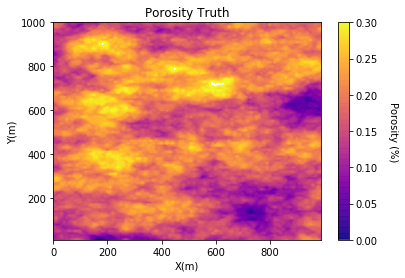

In [63]:
# Make a truth model / unconditional simulation
por_mean = 0.18; por_stdev = 0.05; por_cmin = 0.0; por_cmax = 0.3
var = make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=500.0,hmin1=250.0)
porosity_truth = GSLIB_sgsim_2d_uncond(1,nx,ny,cell_size,seed + 3,var,"Porosity")
porosity_truth = affine(porosity_truth,por_mean,por_stdev)
pixelplt_st(porosity_truth,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,"Porosity Truth","X(m)","Y(m)","Porosity (%)",cmap)

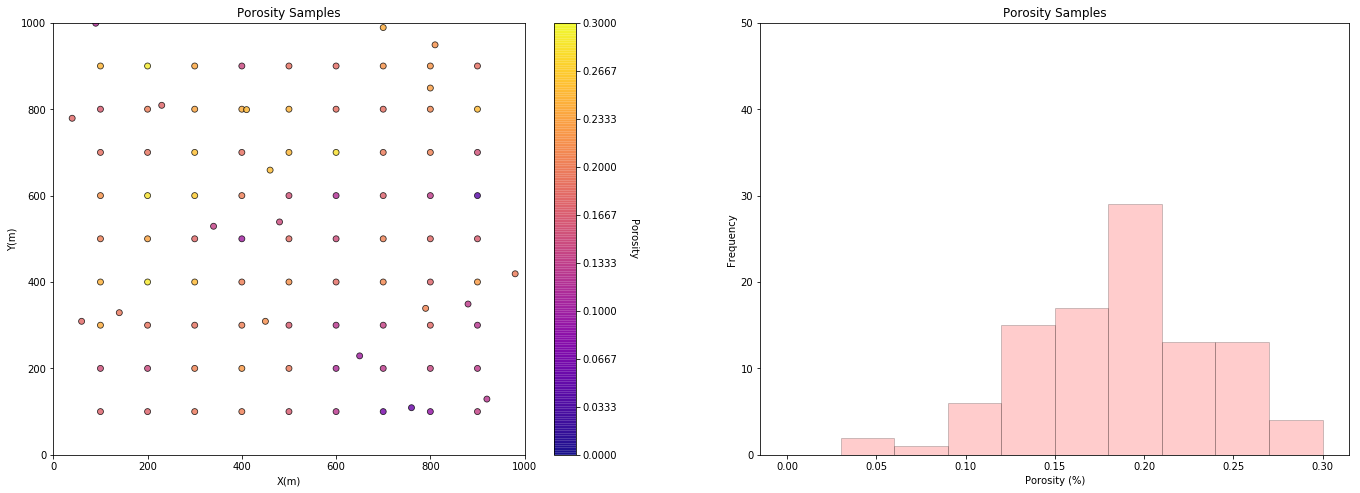

In [64]:
# Make a datset by sampling from the truth model, and display the histogram and location map
mx = 10; my = 10
sample_data1 = regular_sample(porosity_truth,xmin,xmax,ymin,ymax,cell_size,mx,my,"Porosity")
nsamp_random = rand.randint(10,50)
sample_data2 = random_sample(porosity_truth,xmin,xmax,ymin,ymax,cell_size,nsamp_random,'Porosity')
sample_data = pd.concat([sample_data1,sample_data2],ignore_index = True)

plt.subplot(121)
locmap_st(sample_data,'X','Y','Porosity',xmin,xmax,ymin,ymax,por_cmin,por_cmax,'Porosity Samples','X(m)','Y(m)','Porosity',cmap)

plt.subplot(122)
hist_st(sample_data['Porosity'],por_cmin,por_cmax,log=False,cumul=False,bins=10,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,50)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorositySamples.tif',dpi=600,bbox_inches="tight")
plt.show()

In [76]:
# Normal score transform
sample_data['NPor'] = nscore(sample_data['Porosity'].values)
sample_data.head()

,X,Y,Porosity,NPor
0,100.0,900.0,0.249340,1.20036
1,100.0,800.0,0.165778,-0.56805
2,100.0,700.0,0.185706,-0.06271
3,100.0,600.0,0.219606,0.65884
4,100.0,500.0,0.202858,0.31864


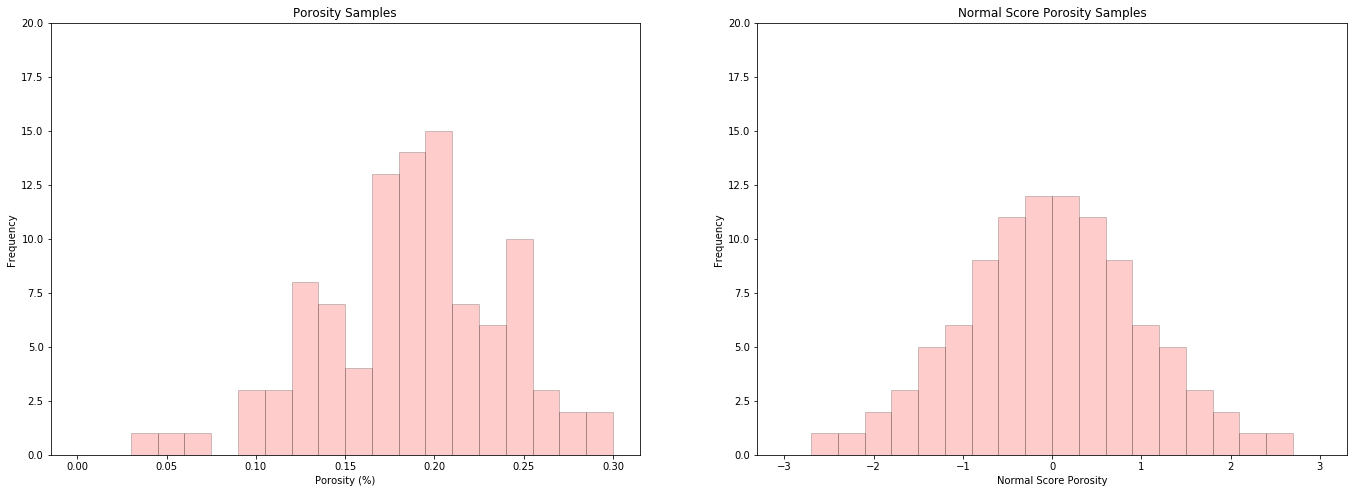

In [79]:
# Check the porosity normal score transformed distribution
plt.subplot(121)
hist_st(sample_data['Porosity'],por_cmin,por_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,20)

plt.subplot(122)
hist_st(sample_data['NPor'],-3,3,log=False,cumul=False,bins=20,weights=None,xlabel="Normal Score Porosity",title="Normal Score Porosity Samples")
plt.ylim(0.0,20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=600,bbox_inches="tight")
plt.show()

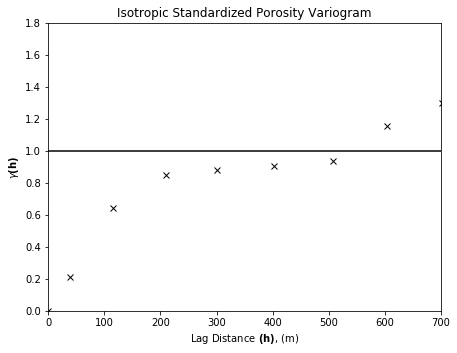

In [100]:
# Calculate sample porosity data isotropic variogram
lag_dist = 100.0; nlag = 7; azi = 0; atol = 90.0; bstand = 1

lag, por_gamma, por_npair = gamv_2d(sample_data,"X","Y","NPor",nlag,lag_dist,azi,atol,bstand)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'Porosity')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic Standardized Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

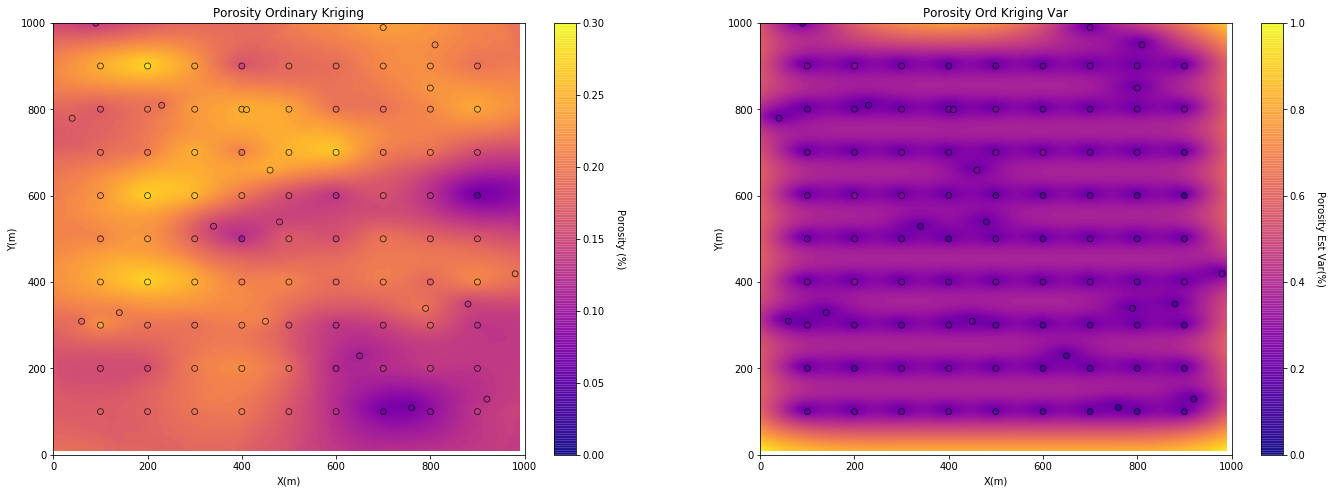

In [80]:
# Kriging extimation map
porosity_est,porosity_var = GSLIB_kb2d_2d(sample_data,'X','Y','Porosity',nx,ny,cell_size,var,"Porosity_Krige")

plt.subplot(121)
locpix_st(porosity_est,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,sample_data,'X','Y','Porosity','Porosity Ordinary Kriging','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
locpix_st(porosity_var,xmin,xmax,ymin,ymax,cell_size,0.0,1.0,sample_data,'X','Y','Porosity','Porosity Ord Kriging Var','X(m)','Y(m)','Porosity Est Var(%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorosityKriged.tif',dpi=600,bbox_inches="tight")
plt.show()

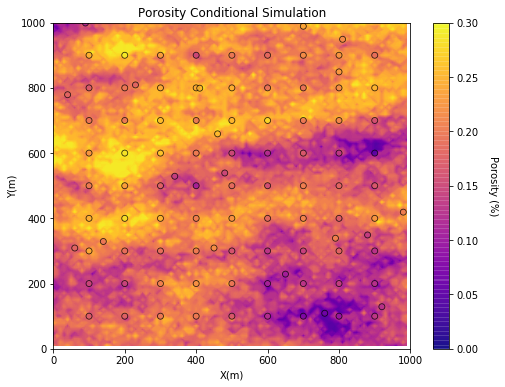

In [66]:
# Conditional simulation - make 1 structure variogram, simulate, transform distribution and visualize
var = make_variogram(nug=0.1,nst=1,it1=1,cc1=0.9,azi1=90,hmaj1=500,hmin1=250)
cond_por_sim = GSLIB_sgsim_2d(1,sample_data,'X','Y','Porosity',nx,ny,cell_size,seed,var,'simulation_cond.out')
locpix(cond_por_sim,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,sample_data,'X','Y','Porosity','Porosity Conditional Simulation','X(m)','Y(m)','Porosity (%)',cmap,"Cond_Por_Sim")

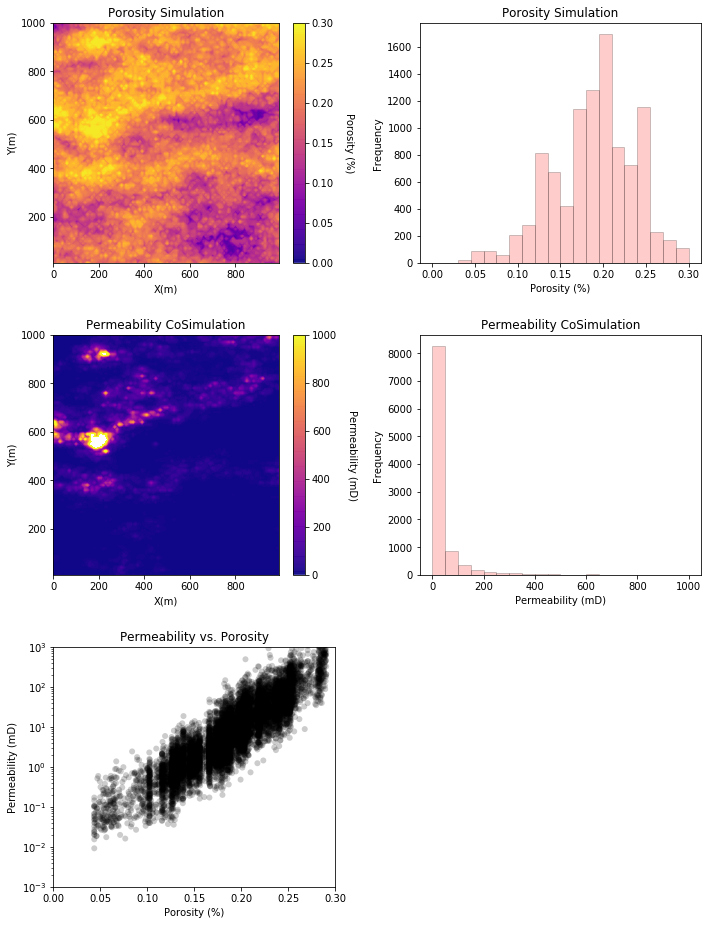

In [99]:
# simulate permeability from porosity 
perm_cmin = 0.0; perm_cmax = 1000
perm_mu = 2.0; perm_sigma = 2.0
correl = 0.9
var_perm = make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=400.0,hmin1=150.0)
cond_perm_sim = GSLIB_cosgsim_2d_uncond(1,nx,ny,cell_size,seed + 5,var_perm,cond_por_sim,correl,"perm_truth.out")
cond_perm_sim = affine(cond_perm_sim,perm_mu,perm_sigma)  
cond_perm_sim = np.exp(cond_perm_sim)

plt.subplot(321)
pixelplt_st(cond_por_sim,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,"Porosity Simulation","X(m)","Y(m)","Porosity (%)",cmap)

plt.subplot(322)
hist_st(cond_por_sim.flatten(),por_cmin,por_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (%)",title="Porosity Simulation")

plt.subplot(323)
pixelplt_st(cond_perm_sim,xmin,xmax,ymin,ymax,cell_size,perm_cmin,perm_cmax,"Permeability CoSimulation","X(m)","Y(m)","Permeability (mD)",cmap)

plt.subplot(324)
hist_st(cond_perm_sim.flatten(),perm_cmin,perm_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Permeability (mD)",title="Permeability CoSimulation")

plt.subplot(325)
plt.scatter(cond_por_sim.flatten(),cond_perm_sim.flatten(), c = "black", marker='o', alpha = 0.2, edgecolors = "none")
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.title('Permeability vs. Porosity')
plt.ylim(0.001,1000)
plt.yscale('log')
plt.xlim(0,0.3)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=3.0, wspace=0.3, hspace=0.3)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=600,bbox_inches="tight")
plt.show()


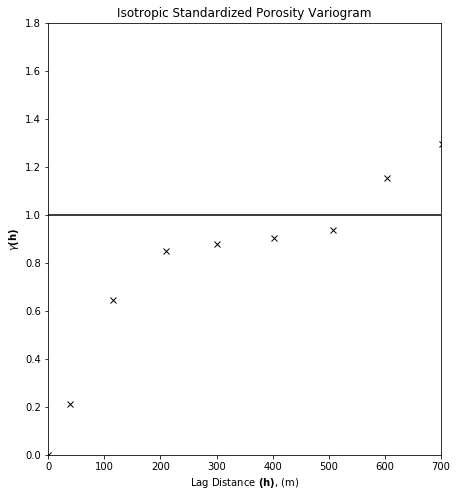

#### Comments

With this basic workflow it would be possible to calculate variograms in Python for any spatial dataset.  Appreciation to Adrian Martinez Vargas for the useful package, it has assisted with teaching geostatistics to my students.   

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

On twitter I'm the @GeostatsGuy.
